# Neural Networks

## Simple neural network

Perceptron

### Initial attributes

In [1]:
import numpy as np

weights = None
bias = None
learning_rate = 0.001
epochs = 1000

### Activation function
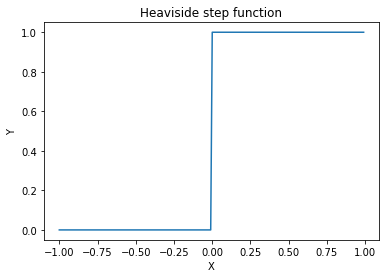

In [2]:
# heaviside activation function
def activation(z):
    return np.heaviside(z, 0) # haviside(z) heaviside -> activation

### Fit method

In [3]:
def fit(X, y):
    n_features = X.shape[1]

    # Initializing weights and bias
    weights = np.zeros((n_features))
    bias = 0

    # Iterating until the number of epochs
    for epoch in range(epochs):

        # Traversing through the entire training set
        for i in range(len(X)):
            z = np.dot(X, weights) + bias # Finding the dot product and adding the bias
            y_pred = activation(z) # Passing through an activation function

            #Updating weights and bias
            weights = weights + learning_rate * (y[i] - y_pred[i]) * X[i]
            bias = bias + learning_rate * (y[i] - y_pred[i])

    return weights, bias

## Predict Method

In [14]:
def predict(X):
    z = np.dot(X, weights) + bias

    return activation(z)

### Join steps

In [33]:
def perceptron_predict(X_train, X_test, y_train):
  weights, bias = fit(X_train, y_train)
  pred = predict(X_test)

  return pred

## Test

In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X = iris.data[:, (0, 1)] # petal length, petal width
y = (iris.target == 0).astype(np.int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

pred = perceptron_predict(X_train, X_test, y_train)
print(pred)

<ipython-input-38-d6871b116613>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


[1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0.]


In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(pred, y_test)

1.0

In [23]:
from sklearn.metrics import classification_report

report = classification_report(pred, y_test, digits=2)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        46
         1.0       1.00      1.00      1.00        29

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



## Making a class

In [39]:
import numpy as np

class Perceptron:

    def __init__(self, learning_rate, epochs):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs

    # heaviside activation function
    def activation(self, z):
        return np.heaviside(z, 0) # haviside(z) heaviside -> activation

    def fit(self, X, y):
        n_features = X.shape[1]

        # Initializing weights and bias
        self.weights = np.zeros((n_features))
        self.bias = 0

        # Iterating until the number of epochs
        for epoch in range(self.epochs):

            # Traversing through the entire training set
            for i in range(len(X)):
                z = np.dot(X, self.weights) + self.bias # Finding the dot product and adding the bias
                y_pred = self.activation(z) # Passing through an activation function

                #Updating weights and bias
                self.weights = self.weights + self.learning_rate * (y[i] - y_pred[i]) * X[i]
                self.bias = self.bias + self.learning_rate * (y[i] - y_pred[i])

        return self.weights, self.bias

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)


perceptron = Perceptron(0.001, 100)

perceptron.fit(X_train, y_train)

pred = perceptron.predict(X_test)

print(accuracy_score(pred, y_test))

report = classification_report(pred, y_test, digits=2)
print(report)

0.9333333333333333
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        17
         1.0       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



# sklearn

In [44]:
from sklearn.linear_model import Perceptron


sk_perceptron = Perceptron()
sk_perceptron.fit(X_train, y_train)
sk_perceptron_pred = sk_perceptron.predict(X_test)

# Accuracy

score = accuracy_score(sk_perceptron_pred, y_test)
print(f"{score:.2f}")
report = classification_report(sk_perceptron_pred, y_test, digits=2)
print(report)

0.97
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Tensorflow

In [46]:
import tensorflow as tf

# Build and Compile the Perceptron Model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),  # Input layer with 2 features
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with a single neuron and sigmoid activation
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
model.fit(X_train, y_train, epochs=50, verbose=0)

# Make Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

1/1 [==============================] - 0s 123ms/step
Accuracy: 1.0


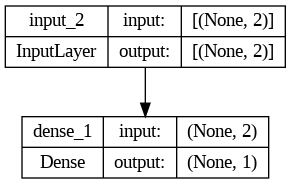

In [51]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='perceptron_visualization.png', show_shapes=True, show_layer_names=True)

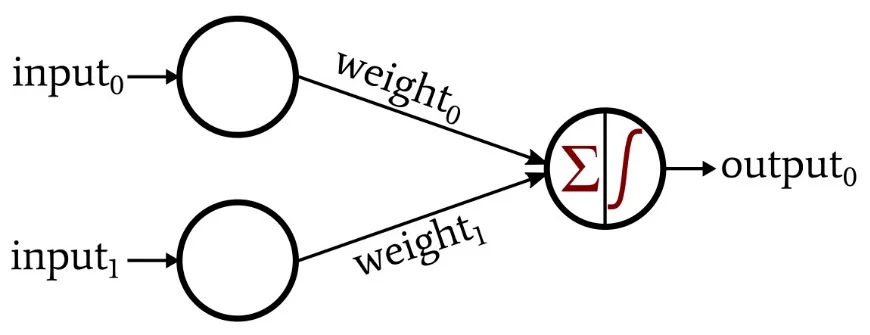